In [1]:
import numpy as np 
from numpy.polynomial.hermite import hermgauss
from fitter.Gn import Gn

from fitter.variance_calc import correct_mult_cl

N             = '3'
N_bins        = 4
Nside         = 256 
gen_lmax      = 3*Nside-1
lmax          = 2*Nside
fitted_params = np.load('fitted_params_Gn_'+N+'.npy')
cl_NG         = np.load('cl_NG.npy')
A             = 1/np.array([0.9448939677570664,0.9713198281538502,0.980159046827993,0.9929136962285946])
cl_NG_corrected = correct_mult_cl(cl_NG,A)

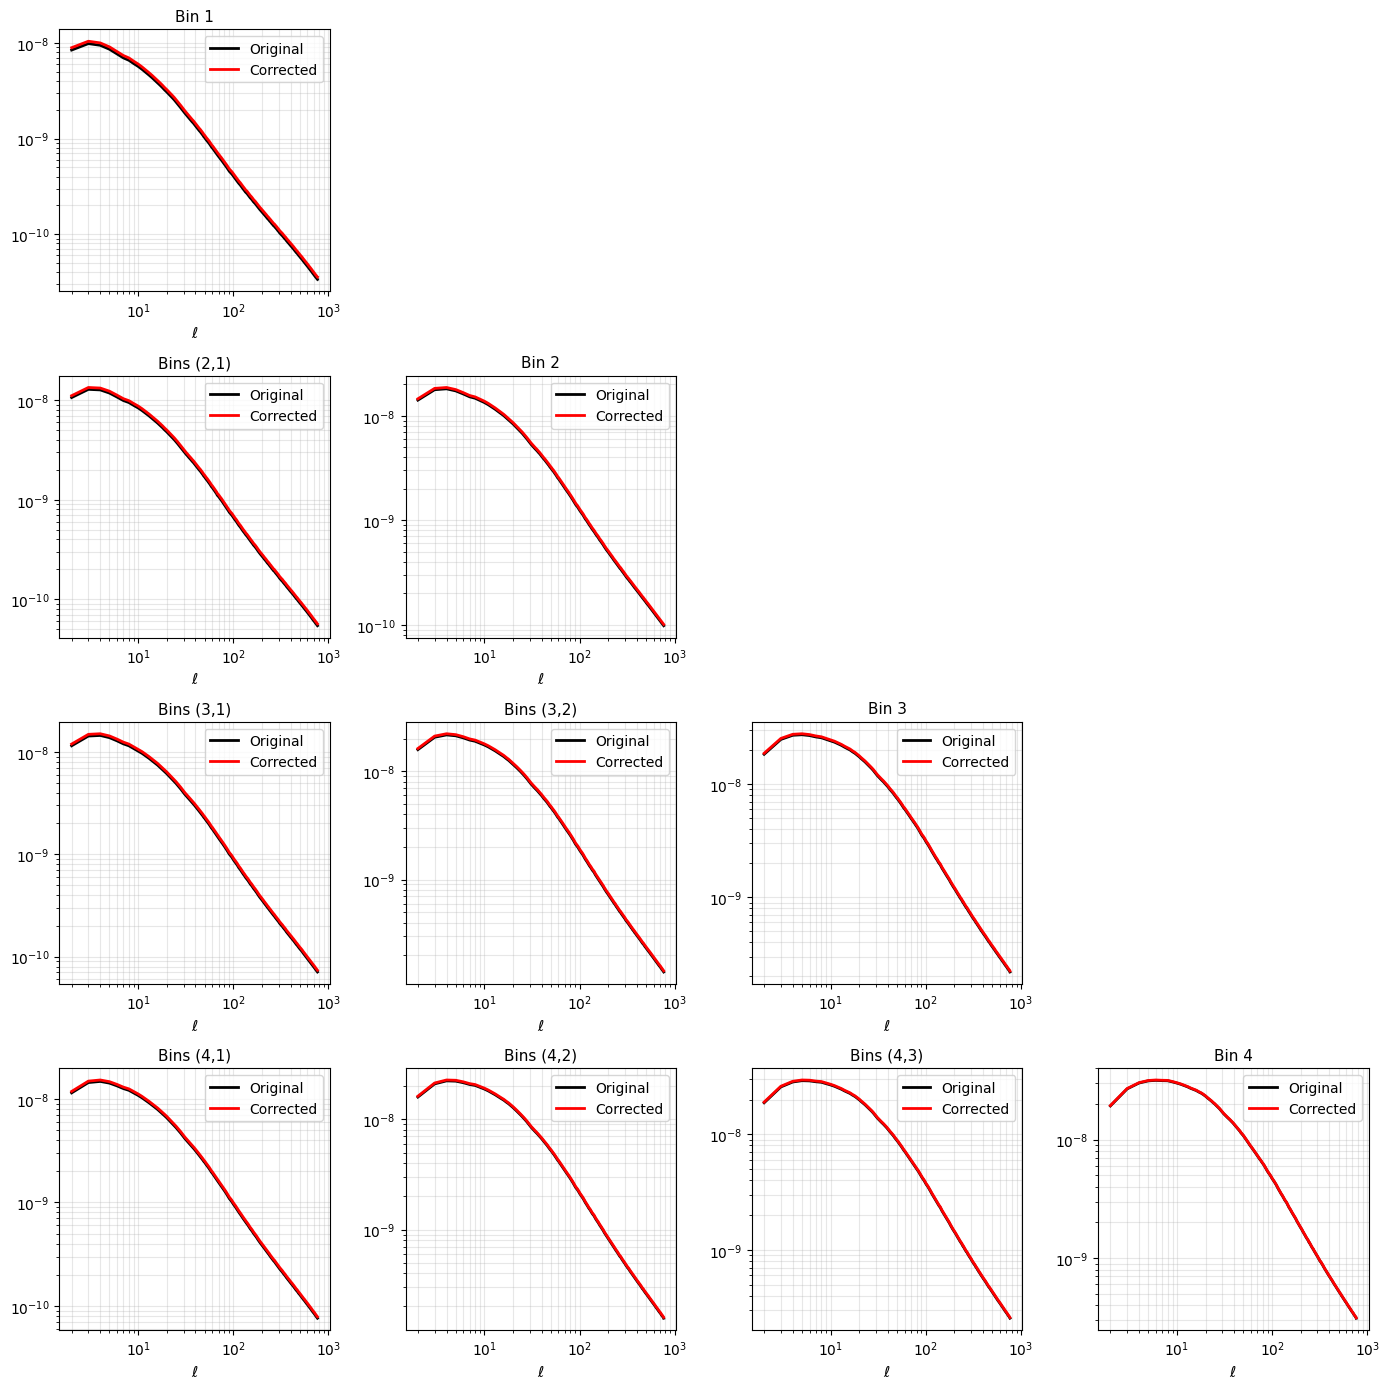

In [2]:
import matplotlib.pyplot as plt

ell = np.arange(768)
fig, axes = plt.subplots(N_bins, N_bins, figsize=(14, 14))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(N_bins):
    for j in range(N_bins):
        if j > i:
            # Upper triangle: turn off
            axes[i, j].axis('off')
            continue
        
        ax = axes[i, j]
        
        # Plot starting from ell=2
        # Plot the average ratio
        ax.loglog(ell[2:], cl_NG[i,j,2:], label='Original', lw=2, color='black')
        ax.loglog(ell[2:], cl_NG_corrected[i,j,2:], label='Corrected', lw=2, color='red')
        # Add a horizontal line at zero to show consistency
        ax.axhline(0, color='black', linestyle='--', lw=1, alpha=0.5)
        
        
        # Always show x-label
        ax.set_xlabel(r'$\ell$', fontsize=11)
        
        # Add bin labels
        if i == j:
            title = f'Bin {i+1}'
        else:
            title = f'Bins ({i+1},{j+1})'
        ax.set_title(title, fontsize=11)
        ax.legend()
        ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

In [3]:
from fitter.transform_cls import C_NG_to_C_G,diagnose_cl_G
cl_G = C_NG_to_C_G(cl_NG_corrected, fitted_params, N_bins, N, quad_order=2,xig_grid_size=1000, n_jobs=-1)
diagnose_cl_G(cl_G)

✓ All matrices are positive definite!
Minimum eigenvalue across all l: 1.000000e-20


In [4]:
np.save('cl_NG_corrected.npy',cl_NG_corrected)

In [ ]:
from scipy.interpolate import interp1d
import healpy as hp 

# We compute the pixwin 
ell_pixwin, _ = hp.Alm.getlm(lmax)
pixwin                 = np.load('/spiff/ivanespinoza/weak_lensing_data_emulator_data/simulations_run/pixwin/pixwin_256.npy')
pixwin_interp          = interp1d(np.arange(len(pixwin)), pixwin)
pixwin_ell_filter      = pixwin_interp(ell_pixwin)
